# What Makes a Successful Seller?
##### By  Tan Jia Min, Zhao Yuqing and Lim Xiao Lan 

### Practical Motivation & Problem Formulation
We decided to tackle the E-commerce data set. As E-commerce is undeniably a rising industry, as well as something all three of our group members share a common interest in, we formulated this problem based on the premise: "What if we wanted to start selling on Olist?". This is such that after completing this mini-project, we will have some real takeaways and consequently be much more informed on business strategies etc, should we ever wish to embark on such a venture. 

Hence, in this project, we will analyse the data and use it to bring insights as to what business decisions a newcomer to Olist should make, in order to have the best chances at earning a high revenue (our chosen indicator for success). Along the way, we will attempt to explain any unexpected trends.

First we started joining the various datasets and picking out the variables relevent to our analysis. We are interested in answering the following questions: 
1) Which Business Segment should the newcomer sell in?          
2) When listing a product, which are the factors that most heavily influence revenue?          
3) Does review score play a part in sales?

### Data Preparation (Extraction, Curation, Joining, Cleaning)

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
customerdata = pd.read_csv('olist_customers_dataset.csv')
customerdata.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
productdata= pd.read_csv('olist_products_dataset.csv')
product = pd.DataFrame(productdata[["product_id", "product_category_name", "product_name_lenght","product_description_lenght","product_photos_qty"]])
product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0


In [4]:
itemdata= pd.read_csv('olist_order_items_dataset.csv')
itemdata.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
orderdata= pd.read_csv('olist_orders_dataset.csv')
order=pd.DataFrame(orderdata[["order_id","customer_id"]])
order.head()

,order_id,customer_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c


In [6]:
sellerdata= pd.read_csv('olist_sellers_dataset.csv')
sellerdata.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [7]:
closeddeals= pd.read_csv('olist_closed_deals_dataset.csv')
businesssegment= pd.DataFrame(closeddeals[["seller_id", "business_segment"]])
businesssegment.head()

,seller_id,business_segment
0,2c43fb513632d29b3b58df74816f1b06,pet
1,bbb7d7893a450660432ea6652310ebb7,car_accessories
2,612170e34b97004b3ba37eae81836b4c,home_appliances
3,21e1781e36faf92725dde4730a88ca0f,food_drink
4,ed8cb7b190ceb6067227478e48cf8dde,home_appliances


In [8]:
#Matching seller information and customer information based on order_id
newdf=pd.merge(sellerdata,itemdata,on='seller_id')
newdf1=pd.merge(newdf,order,on='order_id')
final=pd.merge(newdf1,customerdata,on='customer_id')
final.drop('shipping_limit_date',axis = 'columns',inplace = True)
final.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,price,freight_value,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,106.20,9.56,9d6837f9700a3441e7183bff3bc4eef0,f421a2a66b69dbfe6db0c87845281a90,4661,sao paulo,SP
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,101.70,15.92,a973c4e3ad82777add3fa188f91dacea,b4527423469300ee354458e1b5f961be,32223,contagem,MG
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,10.80,2.42,1554ffe702931a062b4383b109accf63,af0f26435fade1ca984d9affda307199,9310,maua,SP
3,8c16d1f32a54d92897cc437244442e1b,89023,blumenau,SC,bc8a5de6abf5b14f98a6135a7fb46731,1,1b37d55343061aa2b18b807945ff9831,118.90,26.68,1554ffe702931a062b4383b109accf63,af0f26435fade1ca984d9affda307199,9310,maua,SP
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,89.99,45.09,9facbfd2dd51a45404d58154b12ed2dd,be1401bbfd64455c798bb4683e915c61,22050,rio de janeiro,RJ


In [9]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   seller_id                 112650 non-null  object 
 1   seller_zip_code_prefix    112650 non-null  int64  
 2   seller_city               112650 non-null  object 
 3   seller_state              112650 non-null  object 
 4   order_id                  112650 non-null  object 
 5   order_item_id             112650 non-null  int64  
 6   product_id                112650 non-null  object 
 7   price                     112650 non-null  float64
 8   freight_value             112650 non-null  float64
 9   customer_id               112650 non-null  object 
 10  customer_unique_id        112650 non-null  object 
 11  customer_zip_code_prefix  112650 non-null  int64  
 12  customer_city             112650 non-null  object 
 13  customer_state            112650 non-null  o

In [10]:
#Number of unique sellers
numofsellers=final["seller_id"].unique()
print("Number of sellers with unique seller ID :", len(numofsellers))

Number of sellers with unique seller ID : 3095


In [11]:
#Finding the Total Revenue of each seller by aggregating their revenue from all orders
sales = pd.DataFrame(final[["seller_id","price"]])
d = {'price': 'sum'}
revenue = sales.groupby('seller_id', as_index=False).aggregate(d).reindex(columns=sales.columns)
revenue.head()

,seller_id,price
0,0015a82c2db000af6aaaf3ae2ecb0532,2685.00
1,001cca7ae9ae17fb1caed9dfb1094831,25080.03
2,001e6ad469a905060d959994f1b41e4f,250.00
3,002100f778ceb8431b7a1020ff7ab48f,1234.50
4,003554e2dce176b5555353e4f3555ac8,120.00


#### Basic Exploration

In [12]:
#summary statistics
revenue["price"].describe()

count      3095.000000
mean       4391.484233
std       13921.997192
min           3.500000
25%         208.850000
50%         821.480000
75%        3280.830000
max      229472.630000
Name: price, dtype: float64

<AxesSubplot:>

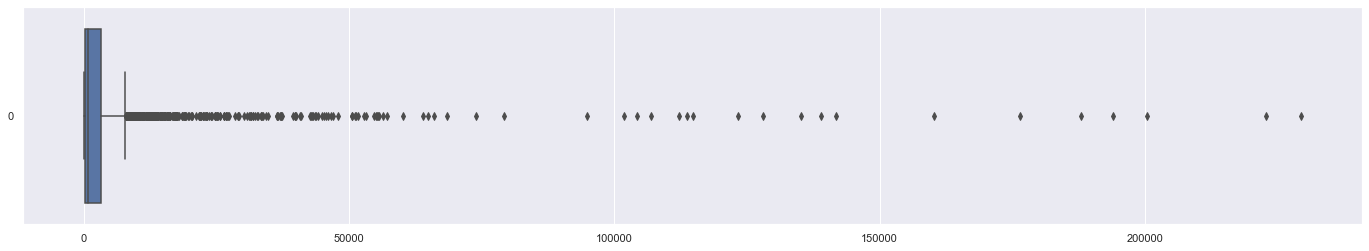

In [13]:
#boxplot
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = revenue["price"], orient = "h")

<AxesSubplot:xlabel='price', ylabel='Count'>

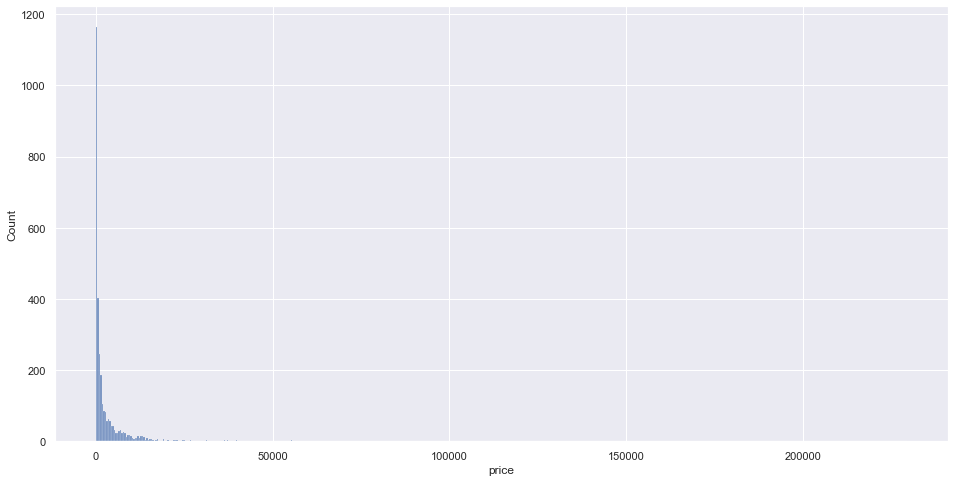

In [14]:
#histogram
f = plt.figure(figsize=(16, 8))
sb.histplot(data = revenue["price"])

<AxesSubplot:xlabel='price', ylabel='Density'>

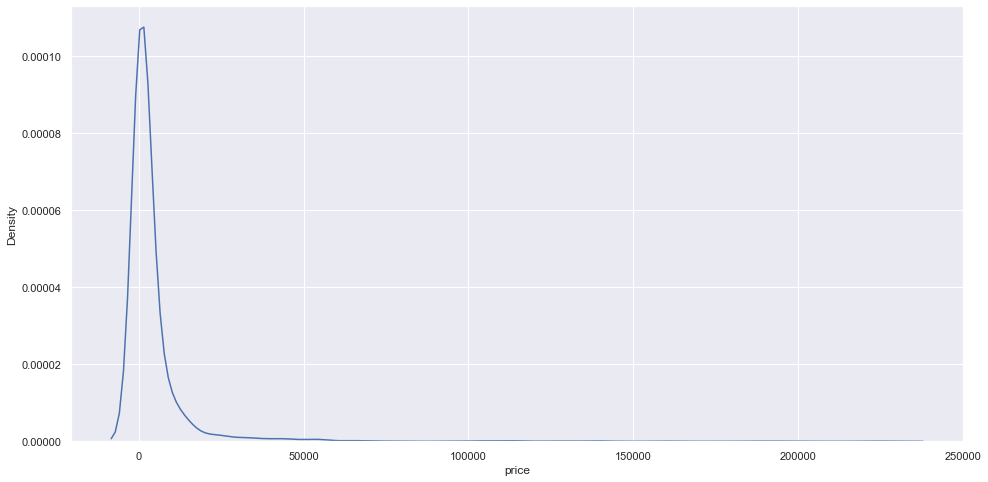

In [15]:
#kde
f = plt.figure(figsize=(16, 8))
sb.kdeplot(data = revenue["price"])

<AxesSubplot:xlabel='price', ylabel='Count'>

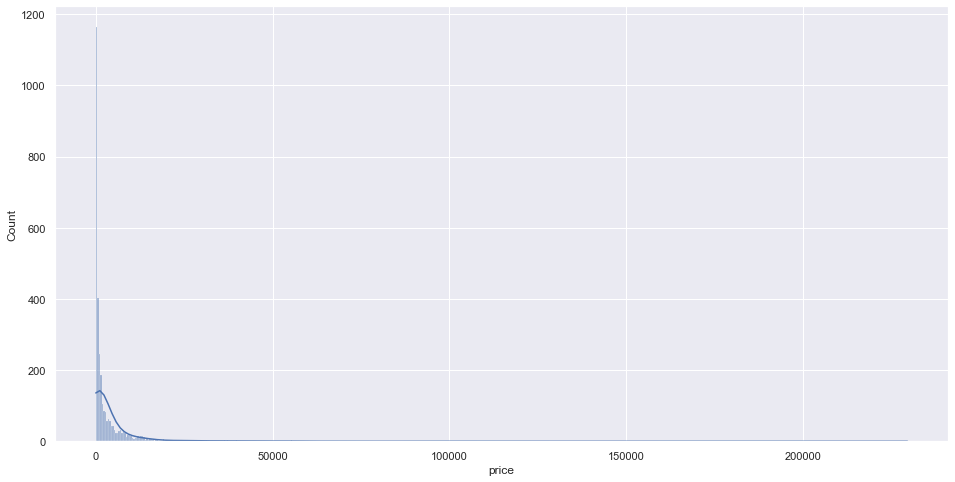

In [16]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data = revenue["price"], kde = True)

## 1) Which Business Segment should we sell in?

Now that we've obtained the revenue of each individual seller, we are curious what category of products the top sellers sell.

In [17]:
#Top 10 Sellers, and their corresponding business segment
category=pd.merge(revenue,businesssegment,on='seller_id')
category.sort_values('price', ascending=False).head(10)



,seller_id,price,business_segment
186,7d13fca15225358621be4086e1eb0964,113628.97,watches
268,ba90964cff9b9e0e6f32b23b82465f7b,44212.50,small_appliances
292,c70c1b0d8ca86052f45a432a38b73958,36537.37,health_beauty
143,612170e34b97004b3ba37eae81836b4c,23065.02,home_appliances
142,6061155addc1e54b4cfb51c1c2a32ad8,15633.40,pet
287,c510bc1718f0f2961eaa42a23330681a,12251.00,baby
168,70c27847eca8195c983ed7e798c56743,12077.52,pet
330,db2956745b3a8e9f3785c99f34b5d25e,8599.00,audio_video_electronics
103,4bfc7a4a1cf8d4d2121c27422d9e50b5,8124.40,home_decor
195,8476243f92442881ddd5b578975cf115,7838.00,audio_video_electronics


Immediately we can see that the seller in first place selling watches has a much higher sales revenue than the rest of the sellers (even more than double of second place!) But is this high sales revenue attributed to this particular business segment? Is selling watches the way to go? Maybe not, as we do not see anymore sellers selling watches in the top ten. Let's have an overview of all sellers in the watch business segment. 

In [18]:
#Sellers in watch business segment
category.query('business_segment == "watches"').head()

,seller_id,price,business_segment
186,7d13fca15225358621be4086e1eb0964,113628.97,watches
274,bce6a5ecf98e99fd2a8868b15c51f04b,3464.90,watches
371,f9eda05b67bef472deaddbba84aca289,185.00,watches


As expected, the high sales revenue from selling watches seems to be specific to this seller only. Perhaps this may be due to established market dominance. For example, buyers who wish to purchase a watch on Olist are likely to buy from the biggest and hence most 'credible' seller that has already shown to have made many sales. This is especially since watches are usually an expensive purchase, and customers may not be willing to risk buying from a smaller less credible seller in fear of being scammed. This erects high barriers to entry for new entrants, which may explain the small number of firms.  

But for now, let's not get ahead of ourselves and complete the visualisation of TOTAL revenue for each of the business segments, rather than just individual sellers.

In [19]:
category.drop('seller_id',axis = 'columns',inplace = True)

In [20]:
#Top 10 business segments with highest combined revenue
cate = category.groupby('business_segment', as_index=False).aggregate(d).reindex(columns=category.columns)
cate.sort_values('price', ascending=False).head(10)

,price,business_segment
28,117278.87,watches
15,90835.82,health_beauty
19,51568.76,household_utilities
1,50265.34,audio_video_electronics
24,47674.87,small_appliances
17,44102.22,home_decor
22,40498.83,pet
8,34538.74,construction_tools_house_garden
6,30174.98,car_accessories
16,26241.17,home_appliances


In [21]:
#Bottom 10 business segments with lowest combined revenue
cate.sort_values('price', ascending=True).head(10)

,price,business_segment
21,388.98,party
14,875.90,handcrafted
12,896.00,games_consoles
13,1045.76,gifts
0,2650.00,air_conditioning
10,3921.83,food_drink
23,4823.29,phone_mobile
27,5596.76,toys
20,5839.64,music_instruments
5,7054.77,books


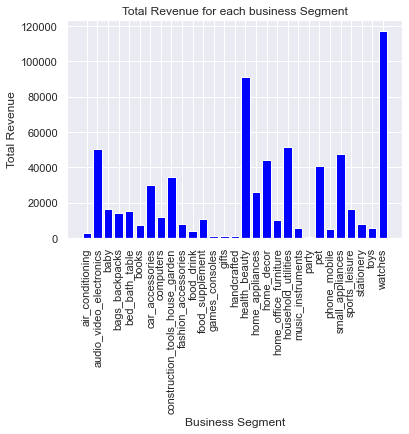

In [22]:
#Plot bar chart for TOTAL revenue for each segment
plt.bar("business_segment", "price", data = cate, color = "blue")
plt.xlabel("Business Segment")
plt.xticks(rotation = 90)
plt.ylabel("Total Revenue")
plt.title("Total Revenue for each business Segment")
plt.show()

Number of unique business segments : 29
air_conditioning                     3
audio_video_electronics             64
baby                                10
bags_backpacks                      22
bed_bath_table                      22
books                                9
car_accessories                     77
computers                           34
construction_tools_house_garden     69
fashion_accessories                 19
food_drink                          26
food_supplement                     28
games_consoles                       2
gifts                                5
handcrafted                         12
health_beauty                       93
home_appliances                      7
home_decor                         105
home_office_furniture               14
household_utilities                 71
jewerly                              8
music_instruments                    9
other                                3
party                                5
perfume                 

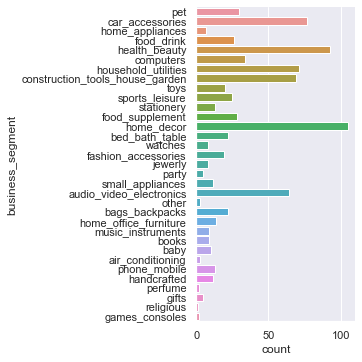

In [23]:
#Number of Firms in each segment
numofcategories=category["business_segment"].unique()

print("Number of unique business segments :", len(numofcategories))
print(businesssegment["business_segment"].value_counts().sort_index(ascending=True))
sb.catplot(y = "business_segment", data = businesssegment, kind = "count")


Observing the number of sellers in each segment, we can also make guesses about the average revenue. Does a high number of firms suggest that the market is highly profitable, thus explaining why many sellers are deciding to sell in that segment? It may also suggest the opposite: with many sellers, it may suggest a highly competitive market which is characterised by lower revenues.

Home decor has the highest number of sellers, followed by Health and Beauty, then car accessories. We can pay attention to these three segments as we proceed. 

In [24]:
#Top 10 business segments with highest average revenue
catecount= businesssegment["business_segment"].value_counts().rename_axis('business_segment').to_frame('counts')
catfinal=pd.merge(cate,catecount,on='business_segment')
catfinal["average_revenue"]=catfinal["price"]/catfinal["counts"]
catfinal.sort_values('average_revenue', ascending=False).head(10)


,price,business_segment,counts,average_revenue
28,117278.87,watches,8,14659.858750
24,47674.87,small_appliances,12,3972.905833
16,26241.17,home_appliances,7,3748.738571
2,16320.96,baby,10,1632.096000
22,40498.83,pet,30,1349.961000
15,90835.82,health_beauty,93,976.729247
0,2650.00,air_conditioning,3,883.333333
1,50265.34,audio_video_electronics,64,785.395937
5,7054.77,books,9,783.863333
19,51568.76,household_utilities,71,726.320563


In [25]:
#Bottom 10 business segments with lowest average revenue
catfinal.sort_values('average_revenue', ascending=True).head(10)

,price,business_segment,counts,average_revenue
14,875.90,handcrafted,12,72.991667
21,388.98,party,5,77.796000
10,3921.83,food_drink,26,150.839615
13,1045.76,gifts,5,209.152000
27,5596.76,toys,20,279.838000
7,11772.29,computers,34,346.243824
23,4823.29,phone_mobile,13,371.022308
11,10618.95,food_supplement,28,379.248214
6,30174.98,car_accessories,77,391.882857
9,7831.08,fashion_accessories,19,412.162105


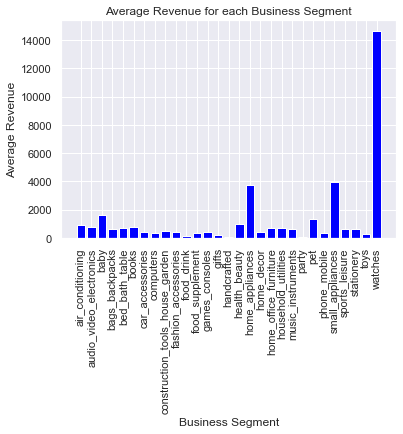

In [26]:
#Plot bar chart of average revenue for each business segment
plt.bar("business_segment", "average_revenue", data = catfinal, color = "blue")
plt.xlabel("Business Segment")
plt.xticks(rotation = 90)
plt.ylabel("Average Revenue")
plt.title("Average Revenue for each Business Segment")
plt.show()

Theorectically, this is a better representation of what the revenue a typical seller in each business segment looks like. But the watch business segment is still rather "problematic", as we know it is not as lucrative as the data makes it seem.

We shall plot a strip plot in order to see if there are any other segments that are misrepresented in a similar way. 

<AxesSubplot:xlabel='price', ylabel='business_segment'>

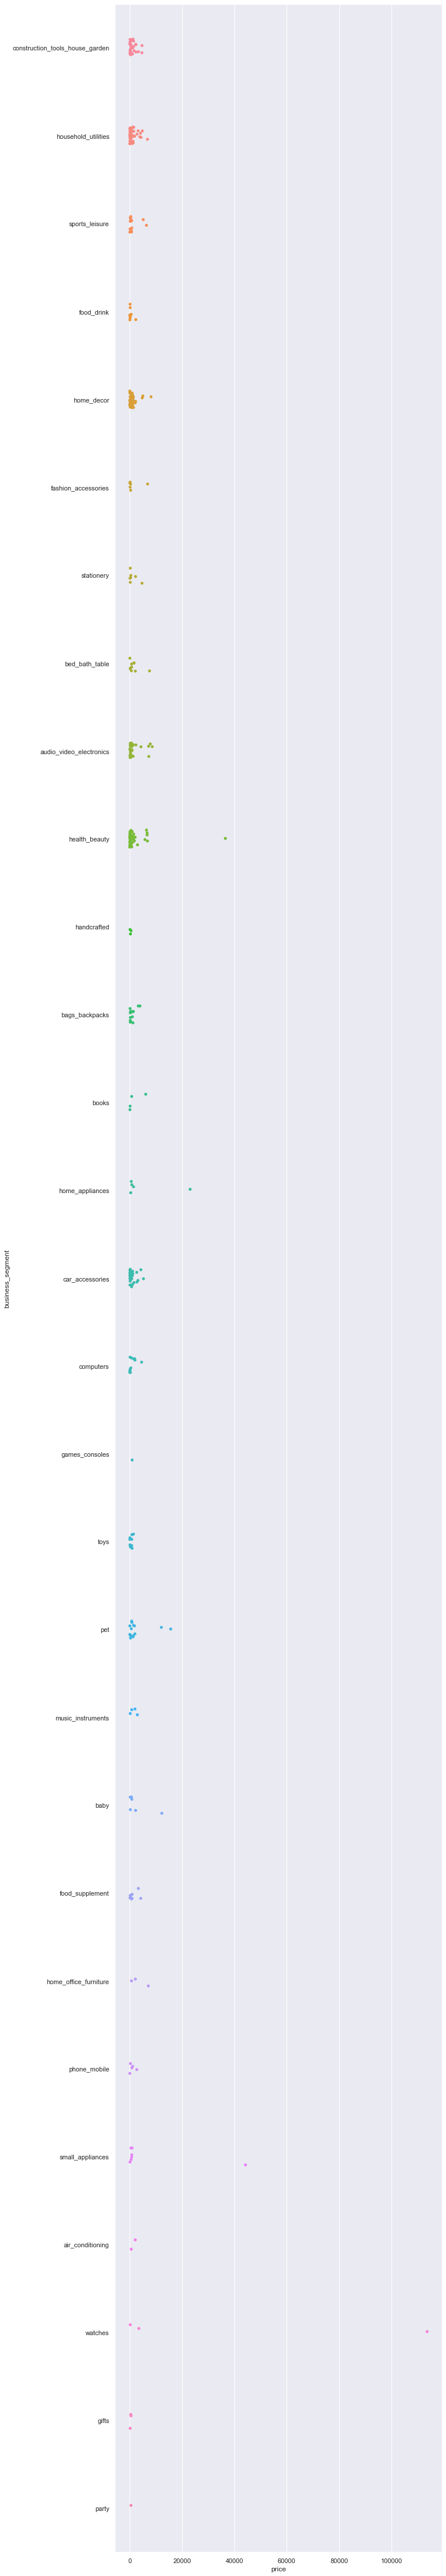

In [27]:
# Strip Plot of individual revenue vs business segment
f = plt.figure(figsize=(10, 80))
sb.stripplot(x = "price", y = "business_segment", data = category, orient = "h")

From the strip plot, it is evident that the most prominent outliers across categories are firms with revenue 20000. We will remove these outliers and see how that affects our plot. 

In [28]:
catnoanomaly=category[category['price'] < 20000]
catnoanomaly.sort_values('price', ascending=False).head()

,price,business_segment
142,15633.40,pet
287,12251.00,baby
168,12077.52,pet
330,8599.00,audio_video_electronics
103,8124.40,home_decor


<AxesSubplot:xlabel='price', ylabel='business_segment'>

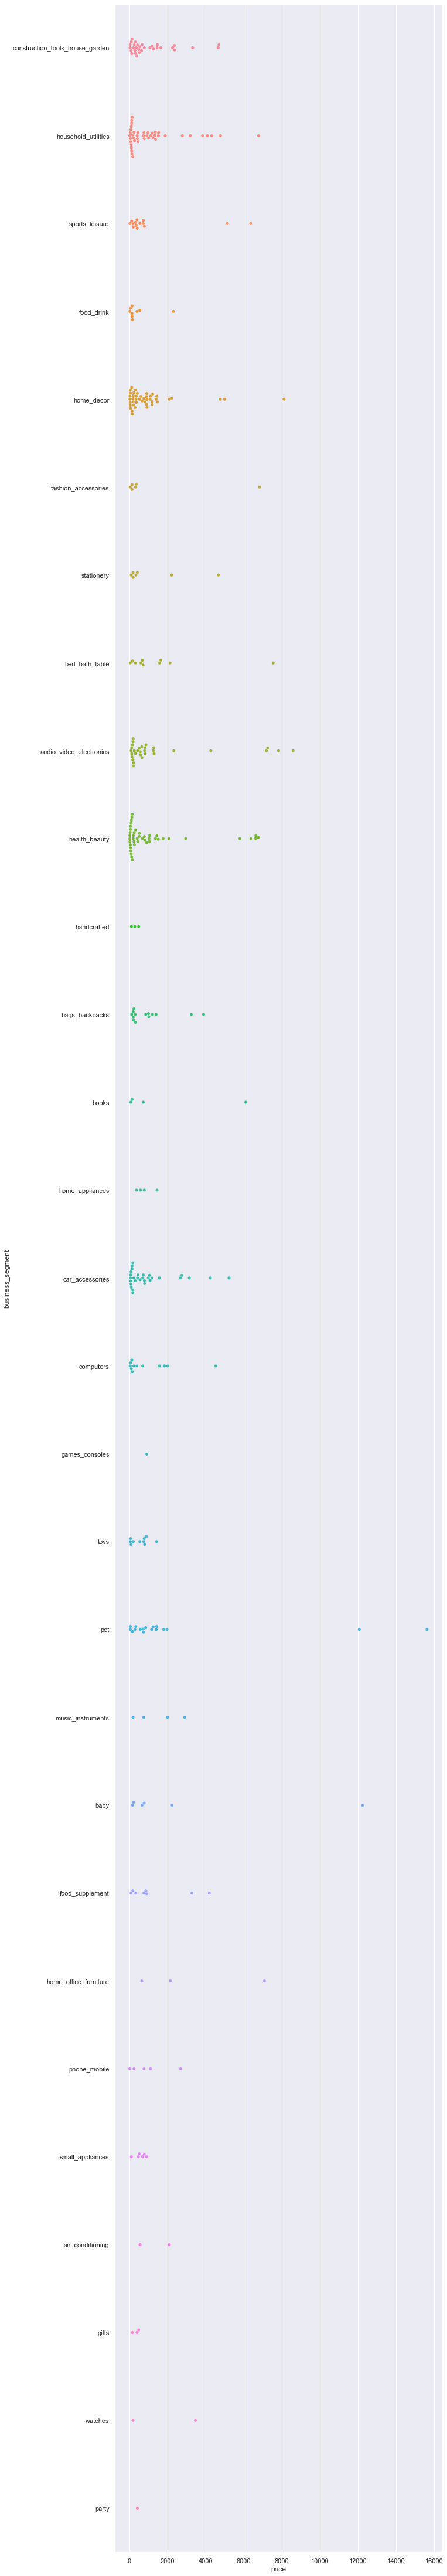

In [29]:
# Swarm Plot of individual revenue vs business segment (outliers removed)
f = plt.figure(figsize=(10, 80))
sb.swarmplot(x = "price", y = "business_segment", data = catnoanomaly, orient = "h")

In [30]:
#Top 10 business segments with highest average revenue (ouliers removed)
catfinal2 = catnoanomaly.groupby('business_segment', as_index=False).aggregate(d).reindex(columns=category.columns)
catfinal2=pd.merge(catfinal2,catecount,on='business_segment')
catfinal2["average_revenue"]=catfinal2["price"]/catfinal2["counts"]
catfinal2.sort_values('average_revenue', ascending=False).head(10)

,price,business_segment,counts,average_revenue
2,16320.96,baby,10,1632.096000
22,40498.83,pet,30,1349.961000
0,2650.00,air_conditioning,3,883.333333
1,50265.34,audio_video_electronics,64,785.395937
5,7054.77,books,9,783.863333
19,51568.76,household_utilities,71,726.320563
18,9900.56,home_office_furniture,14,707.182857
4,15448.53,bed_bath_table,22,702.205909
25,16321.52,sports_leisure,25,652.860800
20,5839.64,music_instruments,9,648.848889


In [31]:
#Bottom 10 business segments with lowest average revenue (ouliers removed)
catfinal2.sort_values('average_revenue', ascending=True).head(10)

,price,business_segment,counts,average_revenue
14,875.90,handcrafted,12,72.991667
21,388.98,party,5,77.796000
10,3921.83,food_drink,26,150.839615
13,1045.76,gifts,5,209.152000
27,5596.76,toys,20,279.838000
24,3462.37,small_appliances,12,288.530833
7,11772.29,computers,34,346.243824
23,4823.29,phone_mobile,13,371.022308
11,10618.95,food_supplement,28,379.248214
6,30174.98,car_accessories,77,391.882857


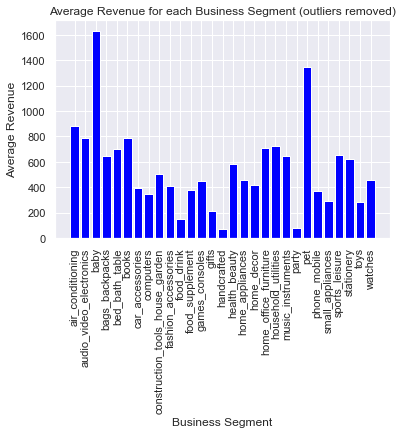

In [32]:
#Plot bar chart of average revenue for each business segment (outliers removed)
plt.bar("business_segment", "average_revenue", data = catfinal2, color = "blue")
plt.xlabel("Business Segment")
plt.xticks(rotation = 90)
plt.ylabel("Average Revenue")
plt.title("Average Revenue for each Business Segment (outliers removed)")
plt.show()

After removing the outliers, we can observe that the average revenue of the various business segments has become more uniformly distributed.

Going back to the three segments with the highest number of sellers:
Car Accessories is in the bottom 10, whereas Home decor and Health and Beauty are neither in the top 10 or bottom 10. Hence it looks like the number of sellers may not be a strong indicator of whether a business segment can bring in high revenues. One can possibly look into entering the baby, pet or airconditioning segment, which have the highest average revenue. 



## 2) When listing a product, which are the factors that most heavily influence revenue?
### Machine Learning: Multi-Variate Linear Regression

We want to determine if there is a linear relationship between total sales for each type of product, and how the product was listed. The listing factors that we selected are: Product Name Length, Product Description Length, Number of Product Photos and Freight Value, which are the factors we believed would most likely affect sales. For example, a lengthy product name might deter customers from buying. On the other hand, a long, detailed and informative description may make consumers more confident in purchasing, and the same can be said about having a greater quantity of photos. A higher freight value (Shipping Price) may cause the product to appear more expensive and less desirable,without actually adding value to the product. This may deter people from buying even if the actual price of the product may be less than an alternative.

Of course these are all our predictions on how these factors affect sales, but we need to perform linear regression in order to confirm if these assumptions apply and are reflected in the data.

Thus for selected product categories, we will attempt to perform a linear regression as such:

Response Variable : **Sales**     
Predictors : **Product Name Length, Product Description Length, Number of Product Photos, Freight Value**       

> Regression Model : Sales = $a_1$ $\times$ product_name_lenght	 + $a_2$ $\times$ product_description_lenght + $a_3$ $\times$ product_photos_qty +$a_4$ $\times$ freight_value + $b$  

In [33]:
#Creating a DataFrame containing each product, its price and its relevant listing factors.
products = pd.merge(product,itemdata, on = 'product_id')
product_final = pd.DataFrame(products[["product_id","price", "product_category_name", "product_name_lenght","product_description_lenght","product_photos_qty","freight_value",]])
product_final.head()

,product_id,price,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,10.91,perfumaria,40.0,287.0,1.0,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,248.00,artes,44.0,276.0,1.0,17.99
2,96bd76ec8810374ed1b65e291975717f,79.80,esporte_lazer,46.0,250.0,1.0,7.82
3,cef67bcfe19066a932b7673e239eb23d,112.30,bebes,27.0,261.0,1.0,9.54
4,9dc1a7de274444849c219cff195d0b71,37.90,utilidades_domesticas,37.0,402.0,4.0,8.29


In [34]:
numofproducts = product_final["product_category_name"].unique()
print("Number of different product category :", len(numofproducts))

Number of different product category : 74


In [35]:
#Number of products in each product category
num =  product_final.groupby('product_category_name')['product_id'].nunique()
d = pd.DataFrame(num)
d1 = d.rename(columns = {'product_id': 'unique_count'}, inplace = False)
count = d1.sort_values(by=['unique_count'])
count

,unique_count
product_category_name,
cds_dvds_musicais,1
seguros_e_servicos,2
pc_gamer,3
fashion_roupa_infanto_juvenil,5
casa_conforto_2,5
...,...
utilidades_domesticas,2335
beleza_saude,2444
moveis_decoracao,2657


For our analysis, we will only use the product categories with highest unique count, i.e. cama_mesa_banho , esporte_lazer , moveis_decoracao, beleza_saude, which are **bed_table_bath** , **sport_leisure** , **decorating_furniture** , **beauty_health** respectively.

In [36]:
# bed_table_bath
cama_mesa_banho1 = product_final.groupby(['product_category_name']).get_group('cama_mesa_banho')
cama_mesa_banho = cama_mesa_banho1.drop_duplicates(subset=['product_id'], keep='first')
cama_mesa_banho

,product_id,price,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,freight_value
19,14aa47b7fe5c25522b47b4b29c98dcb9,71.99,cama_mesa_banho,54.0,630.0,1.0,12.00
34,f53103a77d9cf245e579ea37e5ec51f0,41.99,cama_mesa_banho,52.0,206.0,1.0,13.87
39,518ef5de2c2b3a255e326a4594ba15d9,145.00,cama_mesa_banho,27.0,329.0,2.0,15.18
60,47859fca9dd7485cbd93c3e8993bb74f,41.99,cama_mesa_banho,45.0,206.0,1.0,2.52
92,db46052aed7dff59ba38cf2fe29b87f9,107.60,cama_mesa_banho,56.0,509.0,4.0,12.25
...,...,...,...,...,...,...,...
112490,624a104988a613eba3eae6cd9132d397,58.99,cama_mesa_banho,49.0,330.0,1.0,15.51
112547,5bde14b0ba42a788655c3ebf4ba54597,75.61,cama_mesa_banho,44.0,1054.0,1.0,27.26
112574,dfec64aac9b864b2807a7be33222b75f,84.90,cama_mesa_banho,58.0,252.0,4.0,16.56
112637,9a7c6041fa9592d9d9ef6cfe62a71f8c,127.00,cama_mesa_banho,50.0,799.0,1.0,34.69


In [37]:
# sport_leisure
esporte_lazer1 = product_final.groupby(['product_category_name']).get_group('esporte_lazer')
esporte_lazer = esporte_lazer1.drop_duplicates(subset=['product_id'], keep='first')
esporte_lazer

,product_id,price,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,freight_value
2,96bd76ec8810374ed1b65e291975717f,79.80,esporte_lazer,46.0,250.0,1.0,7.82
28,3bb7f144022e6732727d8d838a7b13b3,26.70,esporte_lazer,22.0,3021.0,1.0,11.85
59,051b9ff13dd55c0a6655a15ff296f80d,285.00,esporte_lazer,50.0,529.0,2.0,20.30
71,ce5b91848b91118daffb3af53b747475,19.90,esporte_lazer,50.0,699.0,4.0,9.44
166,5eaa343860dc445b3fd43d1b682809fd,1090.00,esporte_lazer,53.0,3218.0,5.0,69.65
...,...,...,...,...,...,...,...
112463,7d1a667dbc183583078324f912d42c6b,112.00,esporte_lazer,43.0,2420.0,1.0,12.28
112486,ca977202f2d5bc9cfdc368d305e460b8,42.31,esporte_lazer,26.0,715.0,1.0,7.56
112488,07ae32b18ffbde7c6c928721e8b956fb,187.43,esporte_lazer,28.0,315.0,1.0,17.75
112569,4e1d2ef2974c85d82582edfe594a4f57,14.99,esporte_lazer,43.0,191.0,4.0,7.78


In [38]:
# decorating_furniture
moveis_decoracao1 = product_final.groupby(['product_category_name']).get_group('moveis_decoracao')
moveis_decoracao = moveis_decoracao1.drop_duplicates(subset=['product_id'], keep='first')
moveis_decoracao

,product_id,price,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,freight_value
8,2548af3e6e77a690cf3eb6368e9ab61e,9.99,moveis_decoracao,56.0,184.0,2.0,16.02
26,7bb6f29c2be57716194f96496660c7c2,59.90,moveis_decoracao,51.0,2083.0,2.0,17.70
32,a0736b92e52f6cead290e30b578413b6,49.70,moveis_decoracao,56.0,296.0,2.0,34.66
36,1c1890ba1779090cd54008a3c3302921,111.90,moveis_decoracao,27.0,158.0,4.0,11.99
42,d03bd02af9fff4b98f1c972315e5e9ef,79.90,moveis_decoracao,56.0,209.0,1.0,18.14
...,...,...,...,...,...,...,...
112484,f9bb291280bceedf7840b89e1e75b89c,39.99,moveis_decoracao,57.0,113.0,11.0,11.95
112561,6f79d50d852c044e3f7f0954d13aeacf,119.90,moveis_decoracao,53.0,194.0,11.0,13.18
112585,16280ca280a86fee2ba3c928ed04439f,89.90,moveis_decoracao,64.0,236.0,11.0,12.02
112590,1a14237ecc2fe3772b55c8d4e11ccb35,14.90,moveis_decoracao,58.0,1405.0,3.0,42.52


In [39]:
# beauty_health
beleza_saude1 = product_final.groupby(['product_category_name']).get_group('beleza_saude')
beleza_saude = beleza_saude1.drop_duplicates(subset=['product_id'], keep='first')
beleza_saude

,product_id,price,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,freight_value
40,e3e020af31d4d89d2602272b315c3f6e,29.90,beleza_saude,58.0,1987.0,3.0,15.79
164,c5d8079278e912d7e3b6beb48ecb56e8,95.90,beleza_saude,60.0,330.0,1.0,27.22
179,36555a2f528d7b2a255c504191445d39,29.90,beleza_saude,51.0,1069.0,1.0,16.11
204,e586ebb6022265ae1eea38f46ffe3ead,64.90,beleza_saude,40.0,1469.0,3.0,19.64
221,75b4372e69a42f8ae1d908c076f547b2,255.00,beleza_saude,22.0,1313.0,1.0,15.88
...,...,...,...,...,...,...,...
112426,ff0ba1ffc67724ddc6db331bd417ef67,165.70,beleza_saude,49.0,1029.0,1.0,14.91
112489,d790fcd60d4743d309fedf7e7bb4c902,148.90,beleza_saude,39.0,811.0,1.0,20.23
112493,4419a003d42a243227478f2a949722d8,120.00,beleza_saude,27.0,1026.0,2.0,49.09
112495,2636a9812d151c718b53387171ce08be,30.97,beleza_saude,52.0,2088.0,1.0,14.52


For each category, we wish to find out if there is a linear relation between response and our predicted predictors.     
### (i) bed_table_bath

In [40]:
# Extract Response and Predictors
y = pd.DataFrame(cama_mesa_banho["price"])
X = pd.DataFrame(cama_mesa_banho[["product_name_lenght", "product_description_lenght", "product_photos_qty","freight_value"]])

Set up the regression problem with Train and Test datasets.   

In [41]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (2271, 1) (2271, 4)
Test Set  : (758, 1) (758, 4)


<AxesSubplot:>

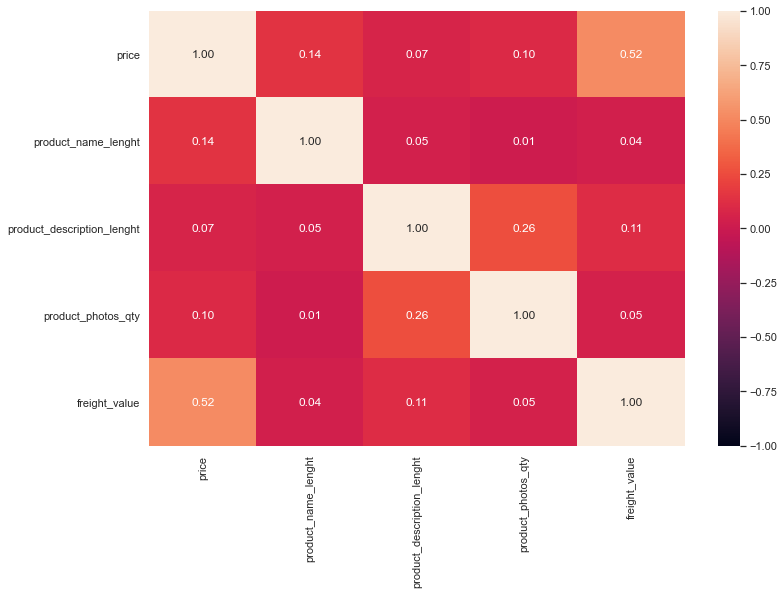

In [42]:
# Correlation between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

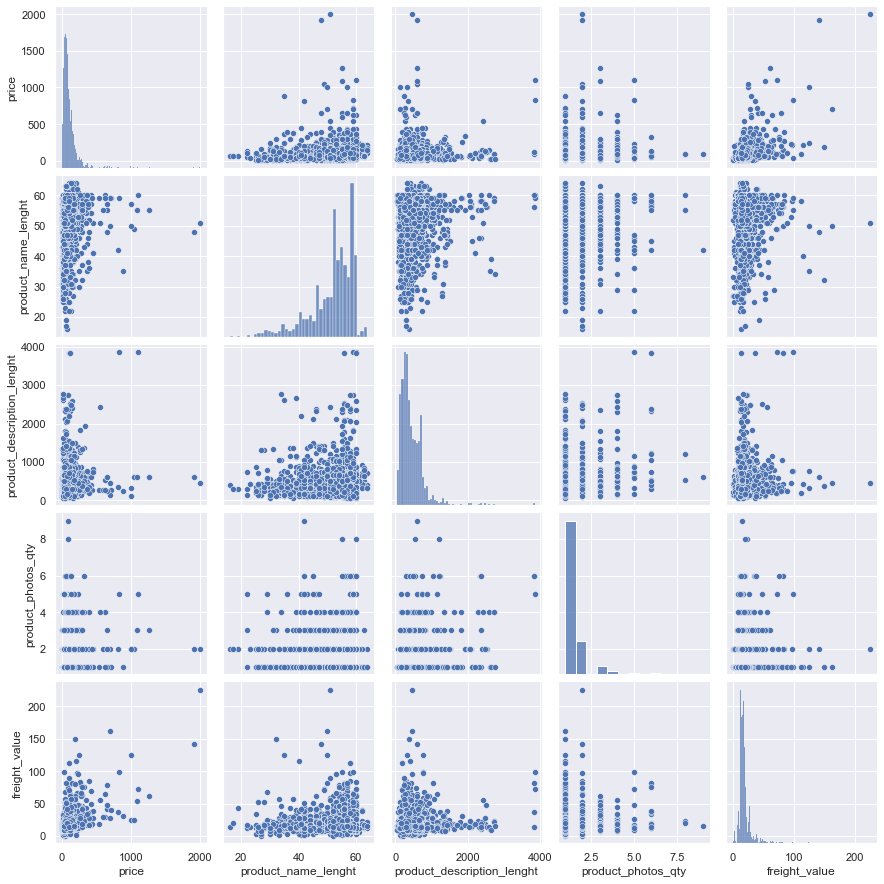

In [43]:
sb.pairplot(data = trainDF)

Looking at only the first row of the heatmap and joint plot, which shows the relationship between price and all the listing factors, we can see that only freight_value has a noteworthy correlation with sale price, and even then it is low one. This is definitely not what we expected. We are going to move on to the other categories to see if this holds true the rest as well. 

#### (ii) sport_leisure

In [44]:
# Extract Response and Predictors
y = pd.DataFrame(esporte_lazer["price"])
X = pd.DataFrame(esporte_lazer[["product_name_lenght", "product_description_lenght", "product_photos_qty","freight_value"]])
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (2150, 1) (2150, 4)
Test Set  : (717, 1) (717, 4)


<AxesSubplot:>

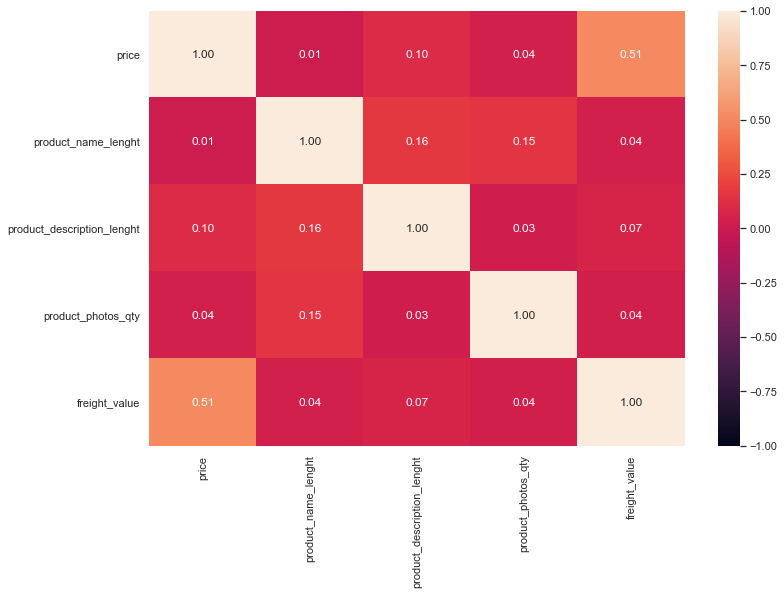

In [45]:
# Correlation between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

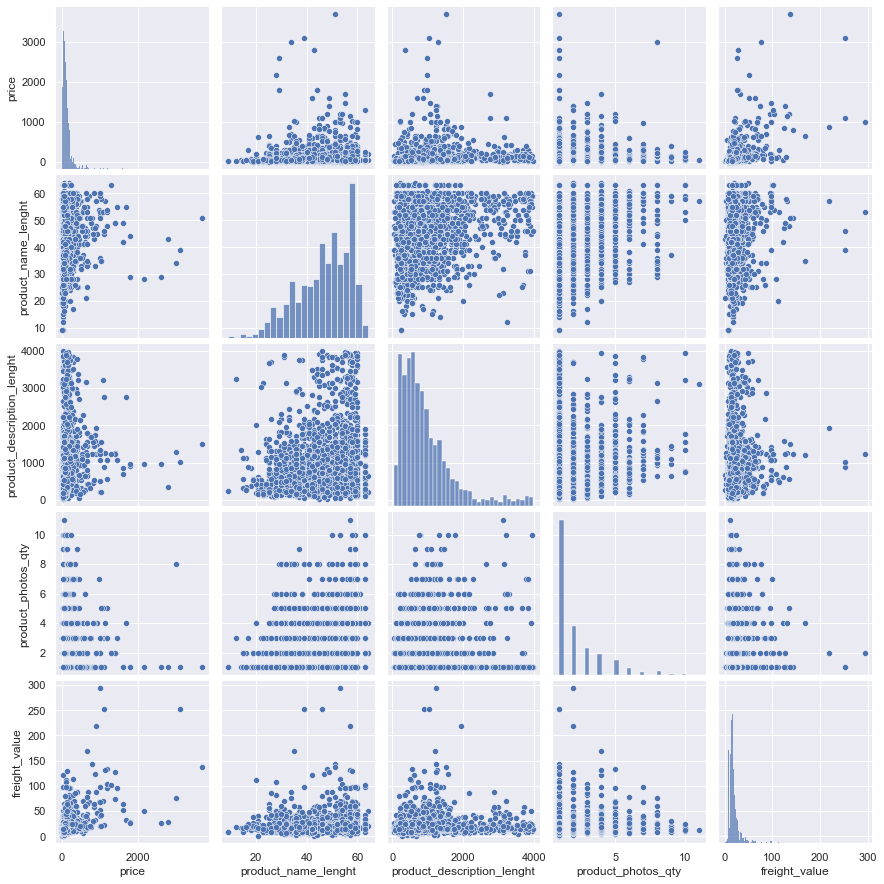

In [46]:
sb.pairplot(data = trainDF)

#### (iii) furniture_decor

In [47]:
# Extract Response and Predictors
y = pd.DataFrame(moveis_decoracao["price"])
X = pd.DataFrame(moveis_decoracao[["product_name_lenght", "product_description_lenght", "product_photos_qty","freight_value"]])
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (1992, 1) (1992, 4)
Test Set  : (665, 1) (665, 4)


<AxesSubplot:>

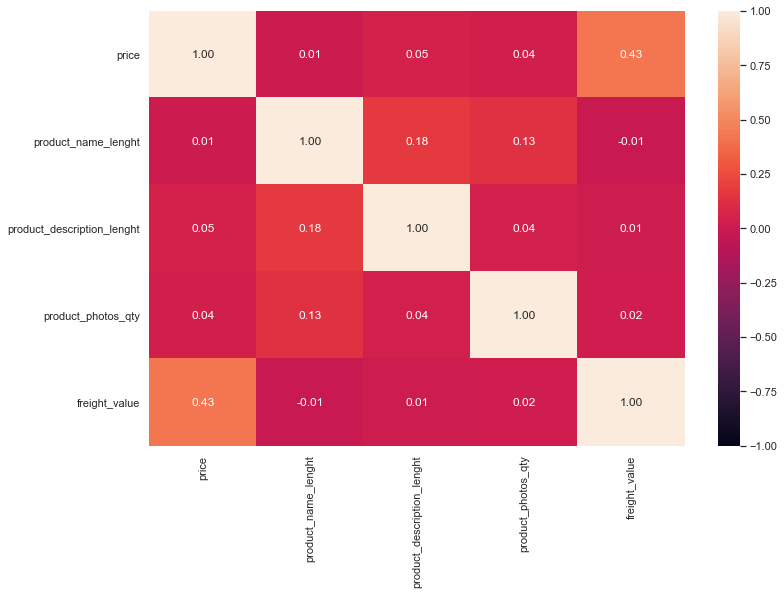

In [48]:
# Correlation between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

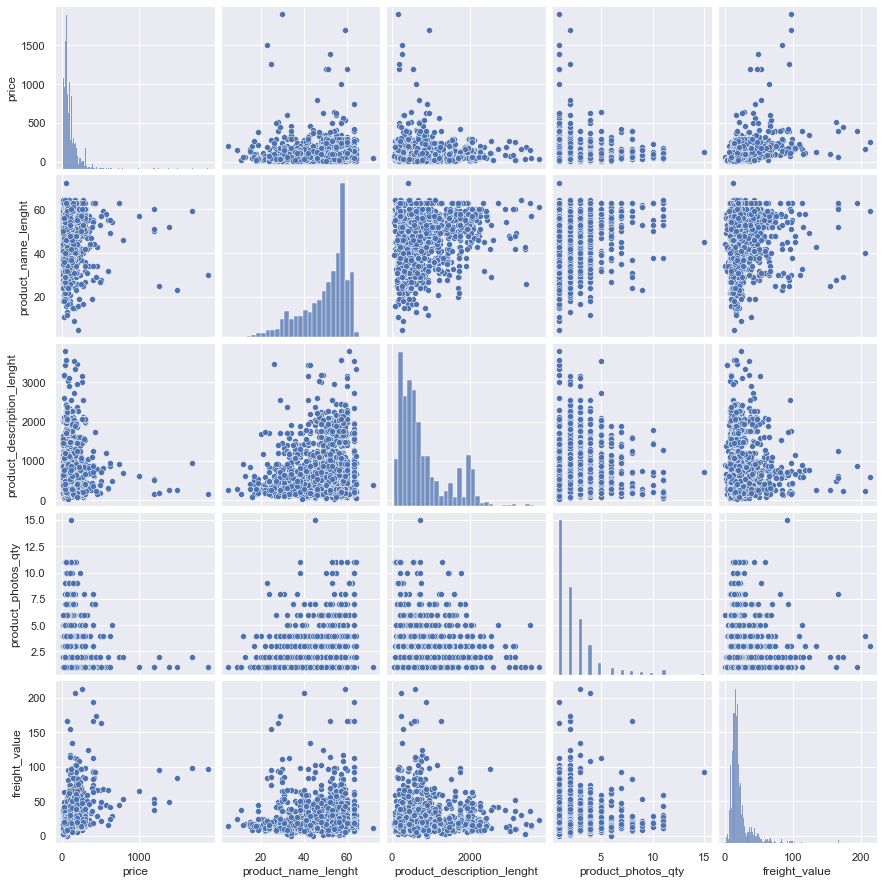

In [49]:
sb.pairplot(data = trainDF)

#### (iv) beauty_health

In [50]:
# Extract Response and Predictors
y = pd.DataFrame(beleza_saude["price"])
X = pd.DataFrame(beleza_saude[["product_name_lenght", "product_description_lenght", "product_photos_qty","freight_value"]])
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (1833, 1) (1833, 4)
Test Set  : (611, 1) (611, 4)


<AxesSubplot:>

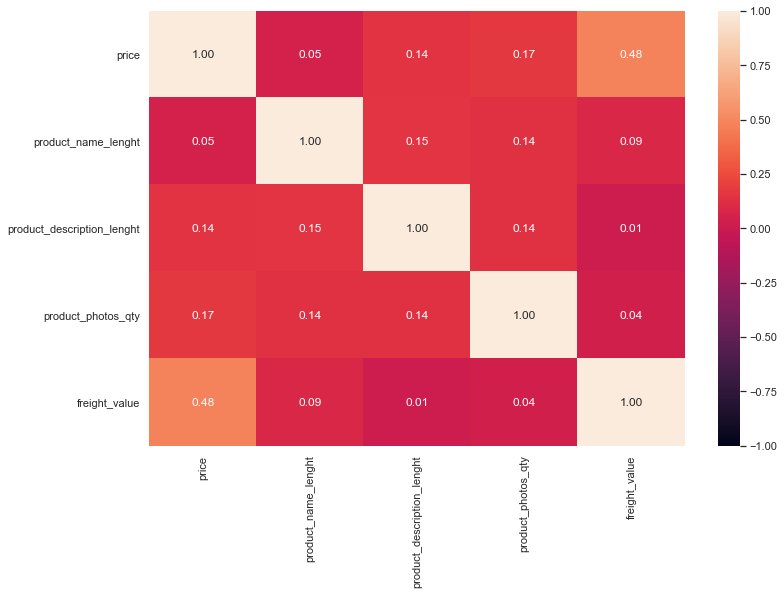

In [51]:
# Correlation between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

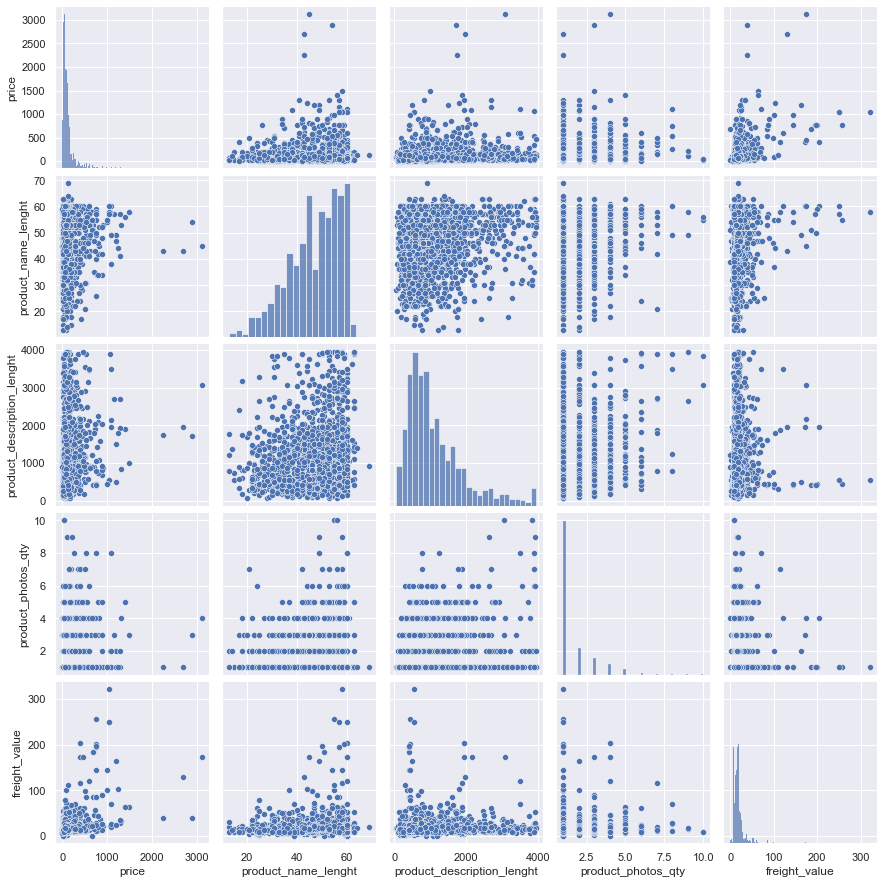

In [52]:
sb.pairplot(data = trainDF)

It seems as though it is true that only freight value has any real correlation with sales (according to the correlation coefficients we have found). From here, we will be considering the following linear regression model:

> Regression Model : Sales = $a$ $\times$ freight_value + $b$  

### Machine Learning: Multi-Variate Linear Regression

### (i) bed_table_bath

In [53]:
sales = pd.DataFrame(cama_mesa_banho['price'])  # Response
freight = pd.DataFrame(cama_mesa_banho['freight_value'])  # Predictor
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
freight_train, freight_test, sales_train, sales_test = train_test_split(freight, sales, test_size = 0.25)

# Check the sample sizes
print("Train Set :", sales_train.shape, freight_train.shape)
print("Test Set  :", sales_test.shape, freight_test.shape)

Train Set : (2271, 1) (2271, 1)
Test Set  : (758, 1) (758, 1)


<AxesSubplot:>

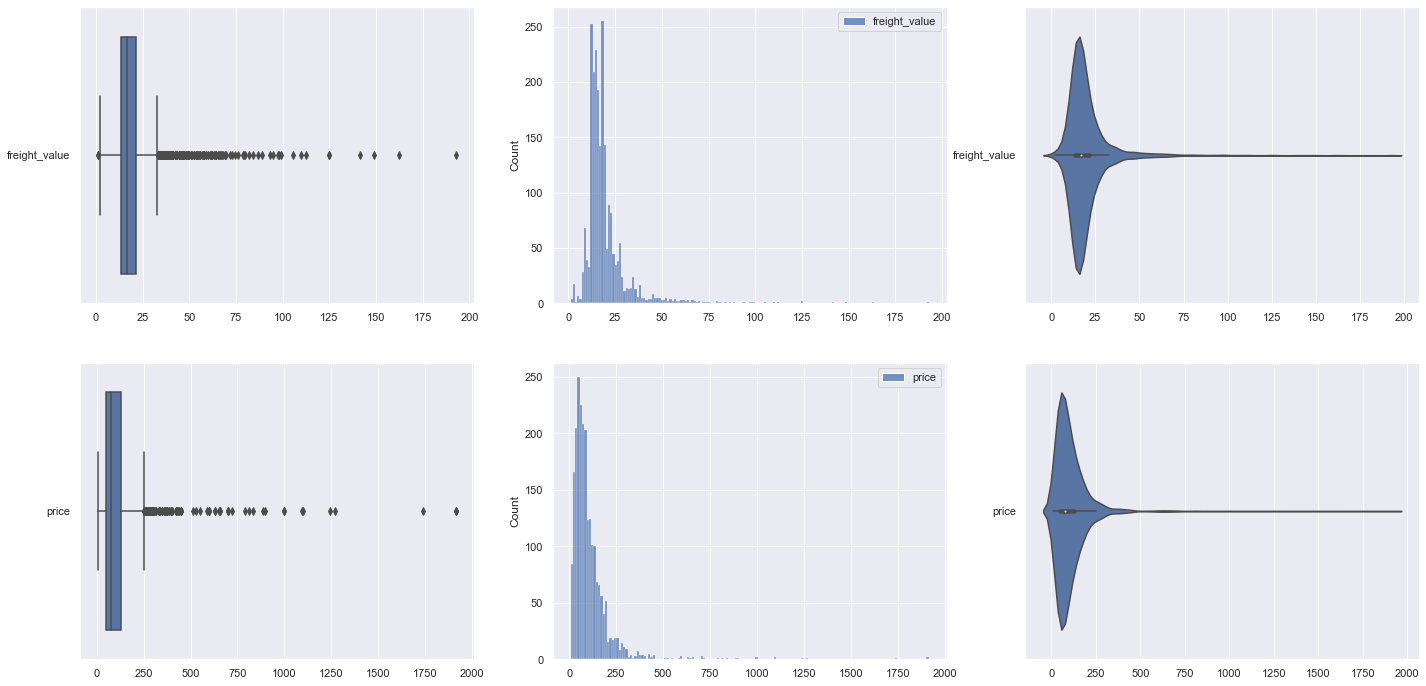

In [54]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for freight Train
sb.boxplot(data = freight_train, orient = "h", ax = axes[0,0])
sb.histplot(data = freight_train, ax = axes[0,1])
sb.violinplot(data = freight_train, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for sales Train
sb.boxplot(data = sales_train, orient = "h", ax = axes[1,0])
sb.histplot(data = sales_train, ax = axes[1,1])
sb.violinplot(data = sales_train, orient = "h", ax = axes[1,2])

Train the Linear Regression model `linreg` using the Train Set.   
Use `freight_train` as *Predictor* and `sales_train` as *Response*.

In [55]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(freight_train, sales_train)

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [11.5536449]
Coefficients 	: a =  [[4.86026609]]


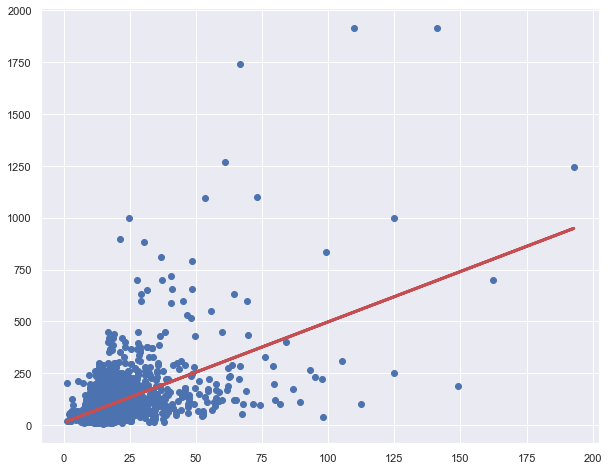

In [56]:
# Formula for the Regression line
regline_x = freight_train
regline_y = linreg.intercept_ + linreg.coef_ * freight_train

# Plot the Linear Regression line
f = plt.figure(figsize=(10, 8))
plt.scatter(freight_train, sales_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

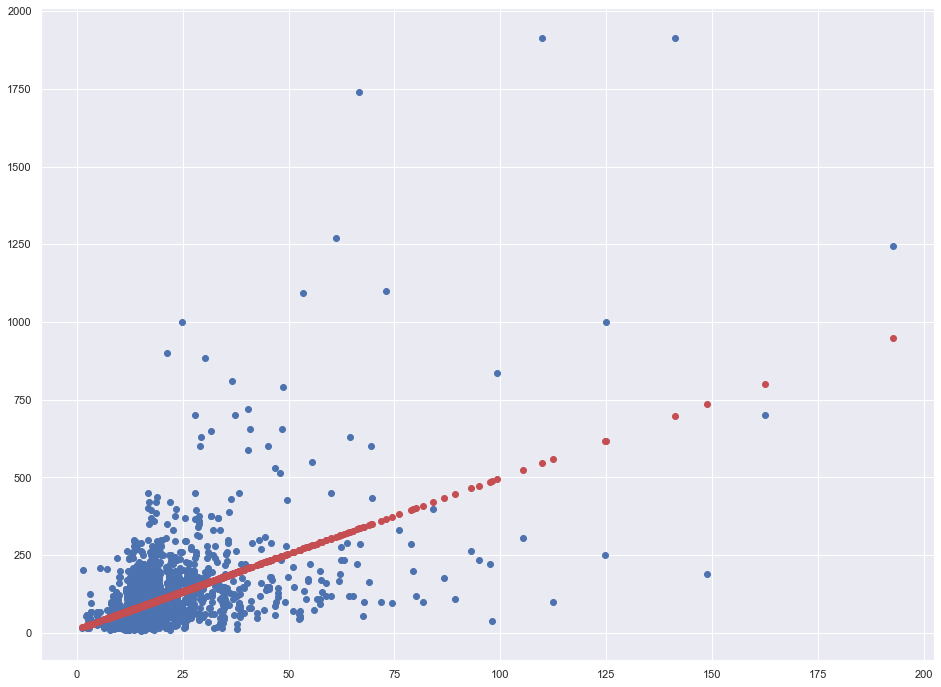

In [57]:
# Predict Sales values corresponding to freight Train
sales_train_pred = linreg.predict(freight_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 12))
plt.scatter(freight_train, sales_train)
plt.scatter(freight_train, sales_train_pred, color = "r")
plt.show()

#### Goodness of Fit of the Model

Check how good the predictions are on the Train Set.    
Metrics : Explained Variance and Mean Squared Error.

In [58]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(freight_train, sales_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(sales_train, sales_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.27135385363469433
Mean Squared Error (MSE) 	: 10924.16547528902
Root Mean Squared Error (RMSE) 	: 104.51873265252034


Test the Linear Regression model `linreg` using the Test Set.  

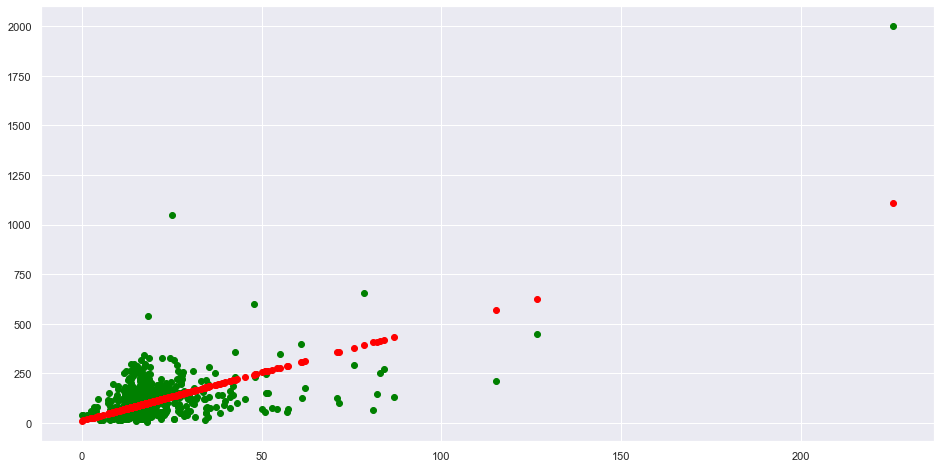

In [59]:
# Predict Total values corresponding to freight Tests
sales_test_pred = linreg.predict(freight_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(freight_test, sales_test, color = "green")
plt.scatter(freight_test, sales_test_pred, color = "red")
plt.show()

Check how good the predictions are on the Test Set.    
Metrics : Explained Variance and Mean Squared Error.

In [60]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(freight_test, sales_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(sales_test, sales_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.32292370343588106
Mean Squared Error (MSE) 	: 7753.351544648504
Root Mean Squared Error (RMSE) 	: 88.05311774519119


### (ii) sport_leisure

Intercept of Regression 	: b =  [7.05260837]
Coefficients of Regression 	: a =  [[6.28844659]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.2792813598775895
Mean Squared Error (MSE) 	: 37067.27447445458

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.18467005116820212
Mean Squared Error (MSE) 	: 16827.100019689246



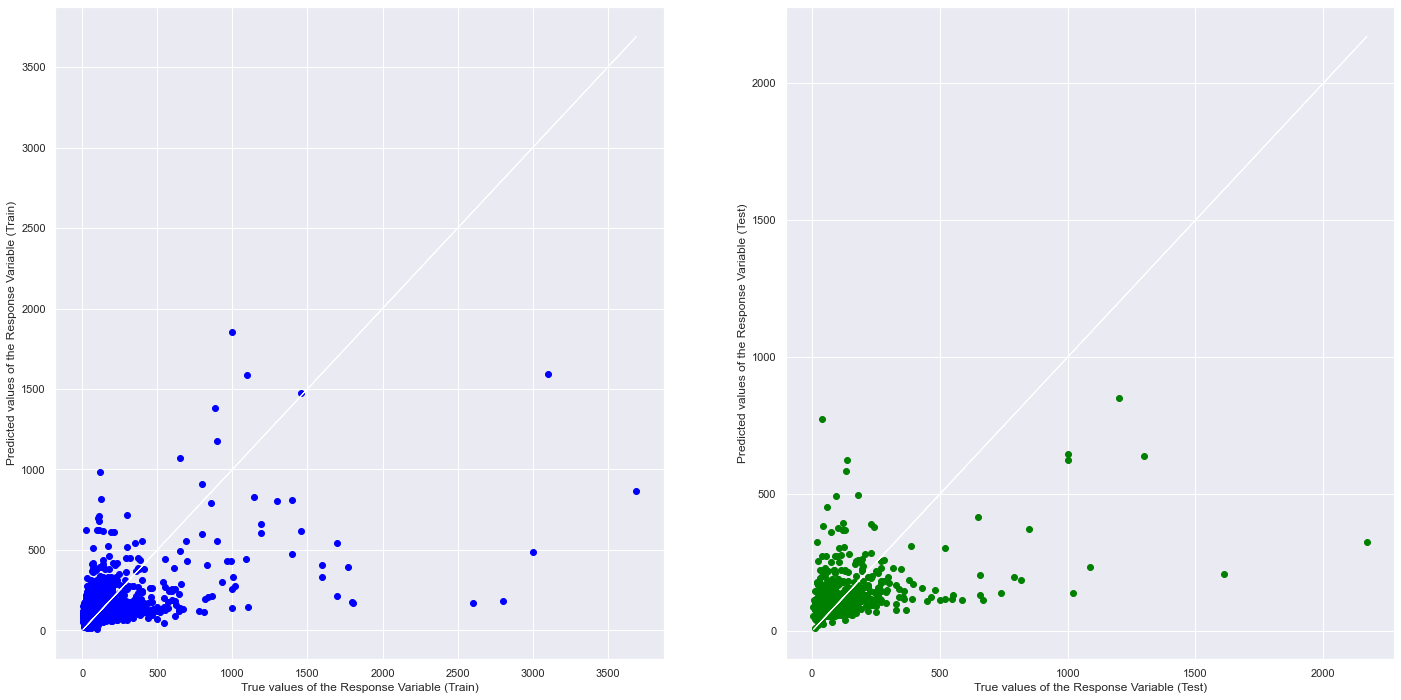

In [81]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Recall the sales-freight value Dataset
sales = pd.DataFrame(esporte_lazer['price'])                  # Response
freight = pd.DataFrame(esporte_lazer['freight_value'])        # Predictor

# Split the Dataset into Train and Test
freight_train, freight_test, sales_train, sales_test = train_test_split(freight, sales, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(freight_train, sales_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict sales values corresponding to freight value
sales_train_pred = linreg.predict(freight_train)
sales_test_pred = linreg.predict(freight_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(freight_train, sales_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(sales_train, sales_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(freight_test, sales_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(freight_test, sales_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(sales_train, sales_train_pred, color = "blue")
axes[0].plot(sales_train, sales_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(sales_test, sales_test_pred, color = "green")
axes[1].plot(sales_test, sales_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

### (iii) furniture_decor

Intercept of Regression 	: b =  [52.82303102]
Coefficients of Regression 	: a =  [[2.12916821]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.17333207964219455
Mean Squared Error (MSE) 	: 8748.857751428652

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.15175090840638994
Mean Squared Error (MSE) 	: 6551.534096165339



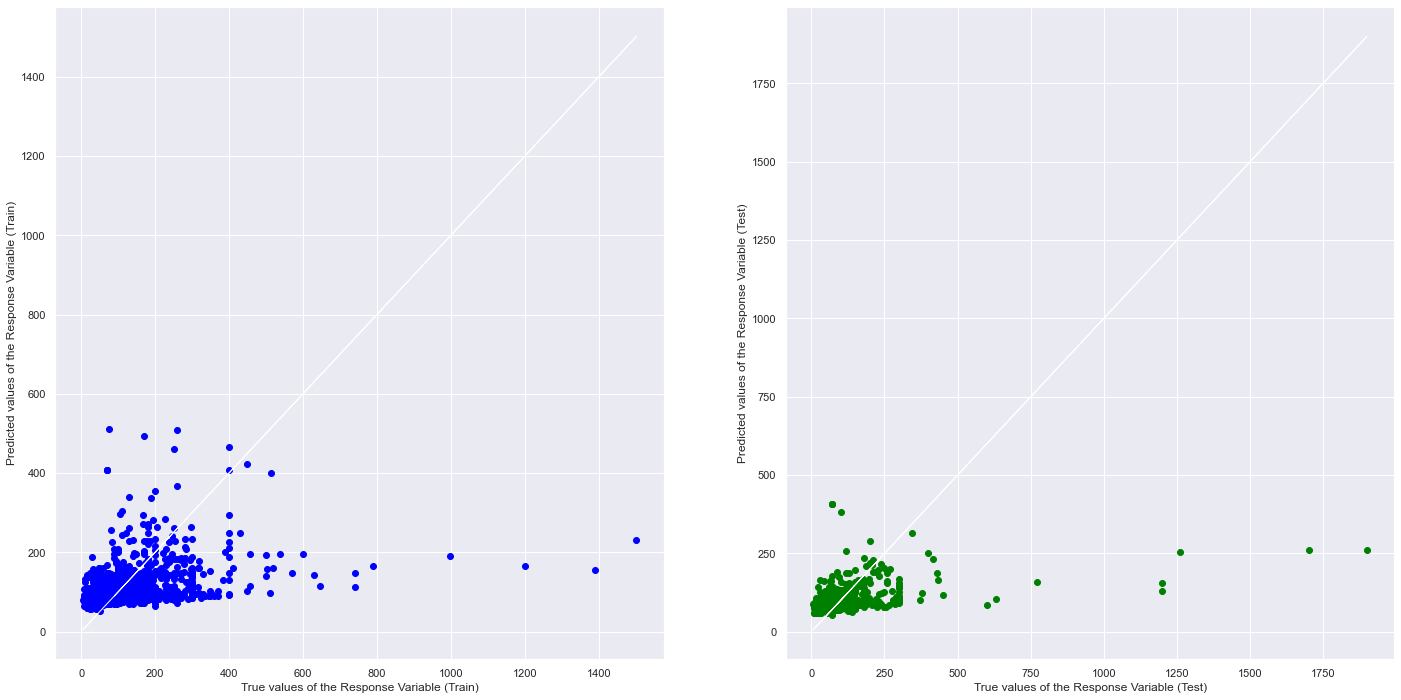

In [62]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Recall the sales-freight value Dataset
sales = pd.DataFrame(moveis_decoracao['price'])                  # Response
freight = pd.DataFrame(moveis_decoracao['freight_value'])        # Predictor

# Split the Dataset into Train and Test
freight_train, freight_test, sales_train, sales_test = train_test_split(freight, sales, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(freight_train, sales_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict sales values corresponding to freight value
sales_train_pred = linreg.predict(freight_train)
sales_test_pred = linreg.predict(freight_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(freight_train, sales_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(sales_train, sales_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(freight_test, sales_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(freight_test, sales_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(sales_train, sales_train_pred, color = "blue")
axes[0].plot(sales_train, sales_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(sales_test, sales_test_pred, color = "green")
axes[1].plot(sales_test, sales_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

### (iv) beauty_health

Intercept of Regression 	: b =  [47.22991037]
Coefficients of Regression 	: a =  [[4.93108767]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.21364399420640234
Mean Squared Error (MSE) 	: 44012.73521531726

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.20410581254851967
Mean Squared Error (MSE) 	: 23903.49066358617



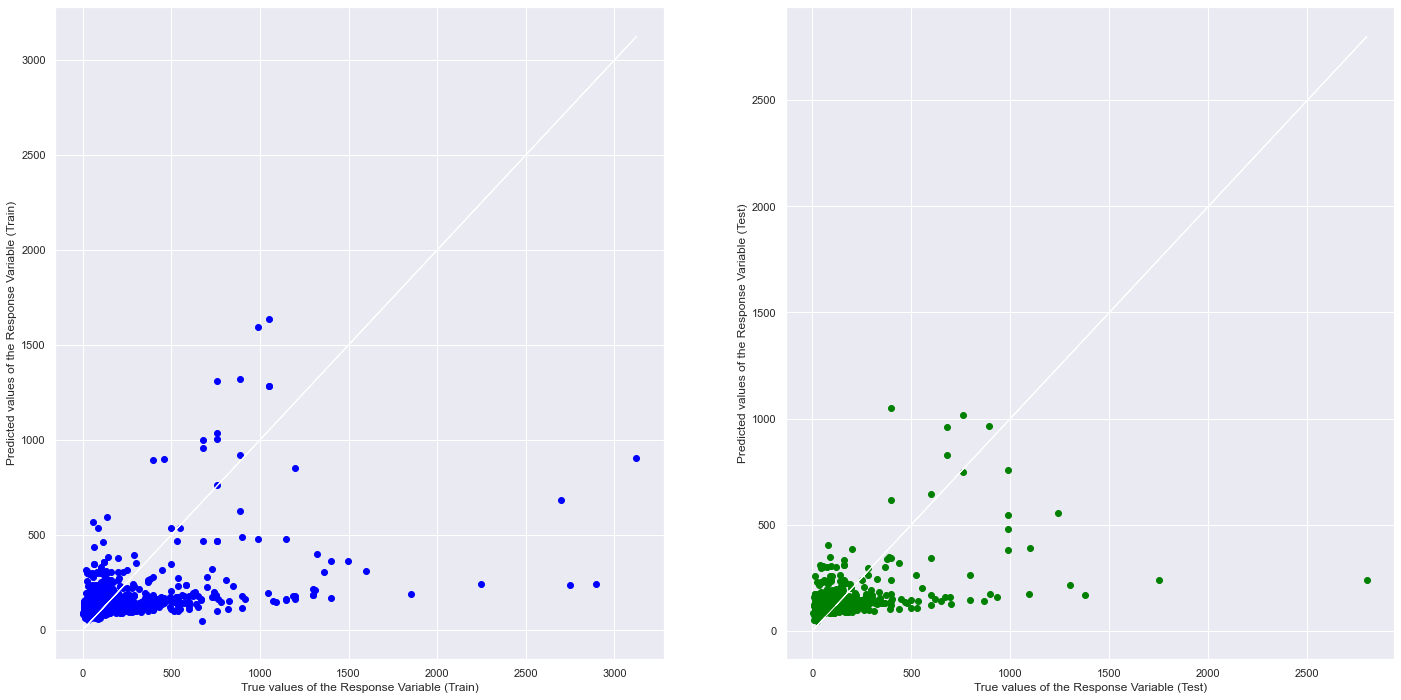

In [63]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Recall the sales-freight value Dataset
sales = pd.DataFrame(beleza_saude['price'])                  # Response
freight = pd.DataFrame(beleza_saude['freight_value'])        # Predictor

# Split the Dataset into Train and Test
freight_train, freight_test, sales_train, sales_test = train_test_split(freight, sales, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(freight_train, sales_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict sales values corresponding to freight value
sales_train_pred = linreg.predict(freight_train)
sales_test_pred = linreg.predict(freight_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(freight_train, sales_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(sales_train, sales_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(freight_test, sales_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(freight_test, sales_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(sales_train, sales_train_pred, color = "blue")
axes[0].plot(sales_train, sales_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(sales_test, sales_test_pred, color = "green")
axes[1].plot(sales_test, sales_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

#### If a newcomer was planning to sell products in any of these categories, they can use the results of these linear regressions to predict his sales given the freight value they decide to set. 

The linear regression shows a weak positive linear relationship with freight value, meaning that as freight value increases reveue of seller increases. This is the opposite of what one will usually expect. 

Usually, a newcomer should aim to set a low freight value in order to improve sales. This can be done by collaborating with delivery companies to reduce shipping costs so as to pass down these cost savings to consumers. For example, on major ecommerce platforms such as Taobao.com or Shoppee, most products are listed with 0 shipping price in order to appear more attractive to consumers.If a newcomer were to set a significant non-zero freight value, it will lose its competitive edge over other similar products. It might be better off to absorb this shipping value into the actual price of the product. 

However, the data shows the opposite. This may be because when customers buy something expensive, they are usually willing to pay a higher freight price in order to ensure their purchase arrives safely, eg luxury perfumes come in fragile glass bottles. There is also a possibility that the items are bulkier, such as electronics, thus require higher costs to ship.

## 3) Does review score play a part in sales?

In [64]:
reviewdata=pd.read_csv('olist_order_reviews_dataset.csv')
reviewdata.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [65]:
sellerinfo=pd.DataFrame(final[['seller_id','order_id']])
sellerinfo

,seller_id,order_id
0,3442f8959a84dea7ee197c632cb2df15,4a90af3e85dd563884e2afeab1091394
1,3442f8959a84dea7ee197c632cb2df15,6d953888a914b67350d5bc4d48f2acab
2,3442f8959a84dea7ee197c632cb2df15,bc8a5de6abf5b14f98a6135a7fb46731
3,8c16d1f32a54d92897cc437244442e1b,bc8a5de6abf5b14f98a6135a7fb46731
4,d1b65fc7debc3361ea86b5f14c68d2e2,035201c3c82a97f8a25dd6bd5244b2d5
...,...,...
112645,e603cf3fec55f8697c9059638d6c8eb5,7aa50aad959e4345b45b9732bc346a6e
112646,e603cf3fec55f8697c9059638d6c8eb5,aae373a2cc64ed2d1f262aa56e70b7e8
112647,e603cf3fec55f8697c9059638d6c8eb5,bc34d5b185152cb88b9f5db391dcd1cb
112648,e603cf3fec55f8697c9059638d6c8eb5,d1edb80f6670902ebbb11765b96873da


In [66]:
review=pd.DataFrame(reviewdata[['order_id','review_score']])
review=pd.merge(sellerinfo,review,on='order_id')
review=pd.merge(revenue,review,on='seller_id')
review.head()

,seller_id,price,order_id,review_score
0,0015a82c2db000af6aaaf3ae2ecb0532,2685.00,7f39ba4c9052be115350065d07583cac,1
1,0015a82c2db000af6aaaf3ae2ecb0532,2685.00,9dc8d1a6f16f1b89874c29c9d8d30447,5
2,0015a82c2db000af6aaaf3ae2ecb0532,2685.00,d455a8cb295653b55abda06d434ab492,5
3,001cca7ae9ae17fb1caed9dfb1094831,25080.03,006e43460a55bc60c0a437521e426529,5
4,001cca7ae9ae17fb1caed9dfb1094831,25080.03,00dfb074b5c910fbd08e04691c4b712f,5


In [67]:
#getting average rating for each shop
review.drop('order_id',axis = 'columns',inplace = True)
d = {'review_score': 'mean','price': 'mean'}
newreview = review.groupby('seller_id', as_index=False).aggregate(d).reindex(columns=review.columns)
newreview.head()

,seller_id,price,review_score
0,0015a82c2db000af6aaaf3ae2ecb0532,2685.00,3.666667
1,001cca7ae9ae17fb1caed9dfb1094831,25080.03,3.874477
2,001e6ad469a905060d959994f1b41e4f,250.00,1.000000
3,002100f778ceb8431b7a1020ff7ab48f,1234.50,3.982143
4,003554e2dce176b5555353e4f3555ac8,120.00,5.000000


In [68]:
#creating a dataframe with just revenue and review score
newreview.drop('seller_id',axis = 'columns',inplace = True)
newreview.head()

,price,review_score
0,2685.00,3.666667
1,25080.03,3.874477
2,250.00,1.000000
3,1234.50,3.982143
4,120.00,5.000000


In [69]:
newreview.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3095 entries, 0 to 3094
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         3095 non-null   float64
 1   review_score  3095 non-null   float64
dtypes: float64(2)
memory usage: 72.5 KB


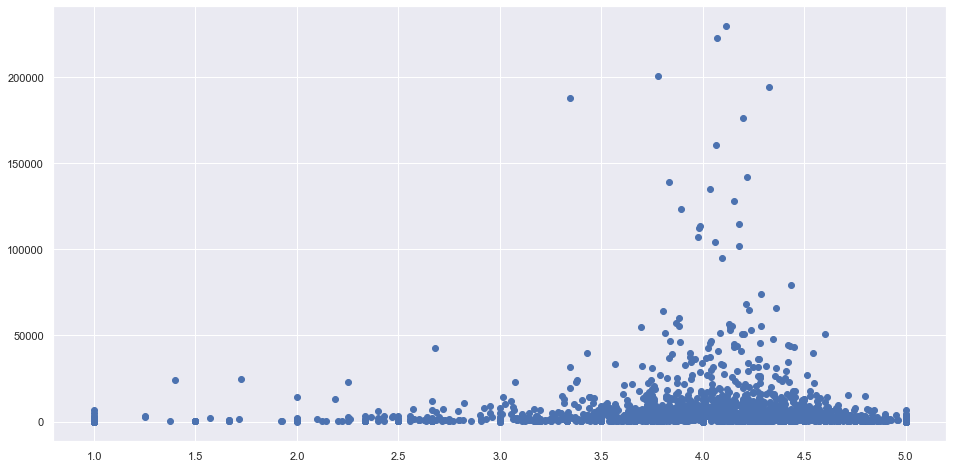

In [70]:
#Plot the raw data on a 2D grid
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "review_score", y = "price", data = newreview)

In [71]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Guess the Number of Clusters
num_clust = 3

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)

# Fit the Clustering Model on the Data
kmeans.fit(newreview)

KMeans(n_clusters=3)

In [72]:
# Print the Cluster Centers
print("Clusters", "\tprice", "\t\treview")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()

Clusters 	price 		review

Cluster 0:	2262.05	3.95	
Cluster 1:	146697.88	4.03	
Cluster 2:	35420.01	3.99	


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cluster', ylabel='count'>

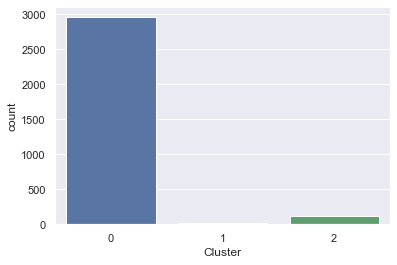

In [73]:
# Predict the Cluster Labels
labels = kmeans.predict(newreview)

# Append Labels to the Data
X_labeled = newreview.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(X_labeled["Cluster"])

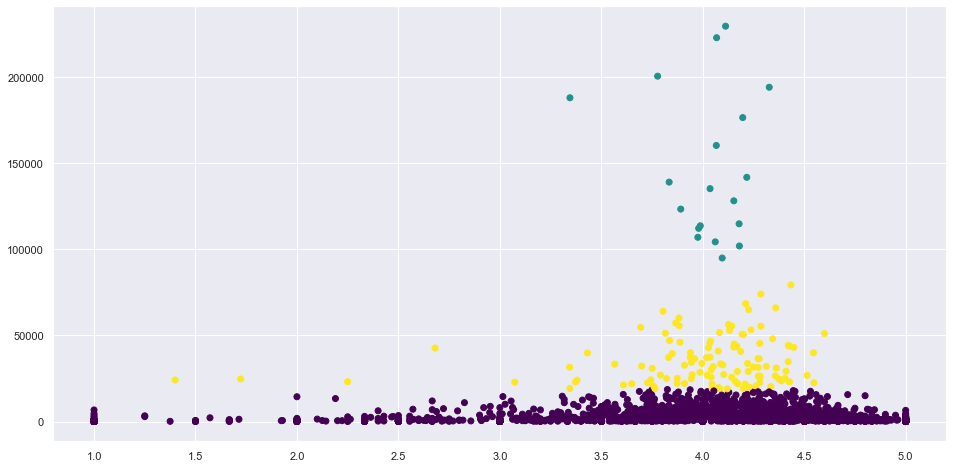

In [74]:
# Visualize the Clusters in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "review_score", y = "price", c = "Cluster", cmap = 'viridis', data = X_labeled)

Here, we can observe that firms with low revenue tend to have a large range of average review scores, from very low (1.0) to very high (5.0). In contrast, firms with very high revenue have a much smaller range of average review scores, all of which fall between 3.0 and 4.5, which is quite high. This is very intuitive as high review scores are indicative of quality products and/or customer service and hence more people are willing to buy or even repurchase from these sellers. 

In [75]:
# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)

Within Cluster Sum of Squares : 89810806461.84972


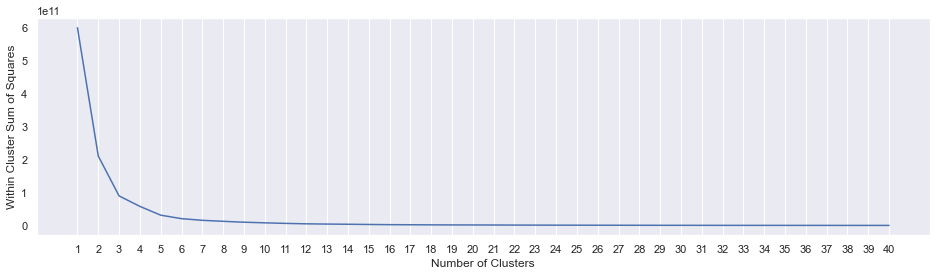

In [76]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Extract the Features from the Data
X = pd.DataFrame(newreview[["review_score", "price"]])

# Vary the Number of Clusters
min_clust = 1
max_clust = 40

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust)
    kmeans.fit(X)
    within_ss.append(kmeans.inertia_)

# Plot Within SS vs Number of Clusters
f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

#### To get optimal number of clusters

Cluster 0:	3.95	1280.78	
Cluster 1:	4.02	149574.75	
Cluster 2:	4.07	44744.77	
Cluster 3:	4.01	12757.1	

Within Cluster Sum of Squares : 58006446767.47711



/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cluster', ylabel='count'>

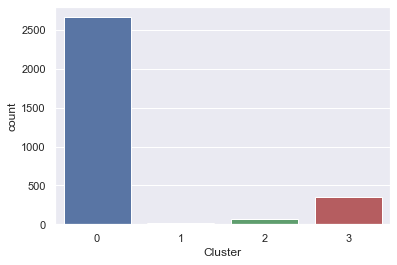

In [77]:
# Set "optimal" Number of Clusters
num_clust = 4

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)                 

# Fit the Clustering Model on the Data
kmeans.fit(X)

# Print the Cluster Centers
for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(X_labeled["Cluster"])

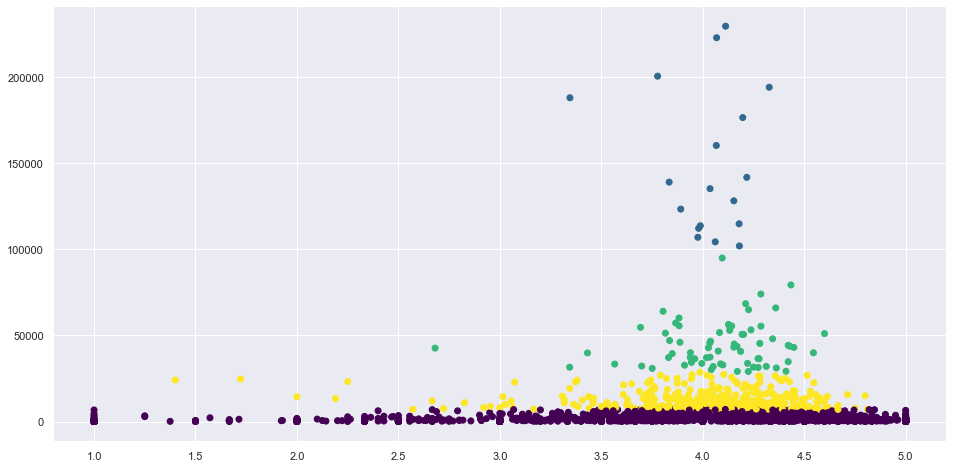

In [78]:
# Visualize the Clusters in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "review_score", y = "price", c = "Cluster", cmap = 'viridis', data = X_labeled)

#### Interpreting the clusters

<AxesSubplot:xlabel='price', ylabel='Cluster'>

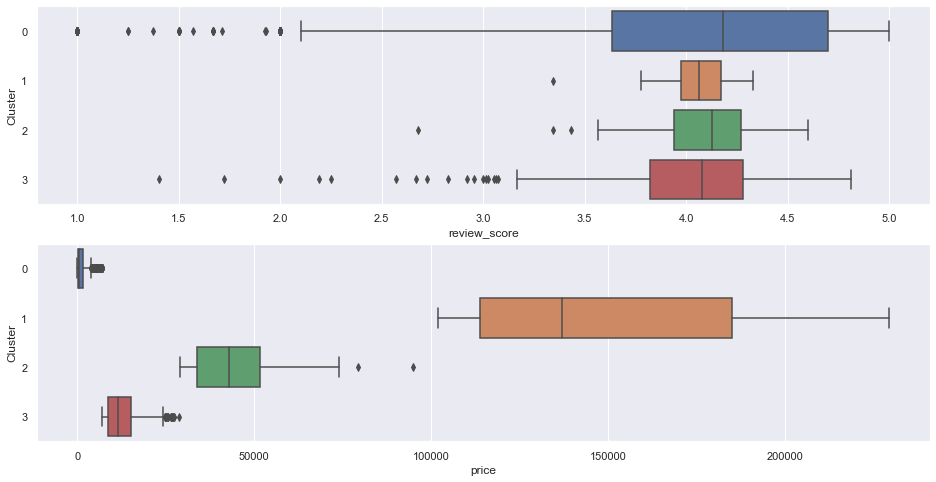

In [79]:
# Boxplots for the Features against the Clusters
f, axes = plt.subplots(2, 1, figsize=(16,8))
sb.boxplot(x = 'review_score', y = 'Cluster', data = X_labeled, ax = axes[0])
sb.boxplot(x = 'price', y = 'Cluster', data = X_labeled, ax = axes[1])

<AxesSubplot:xlabel='Cluster'>

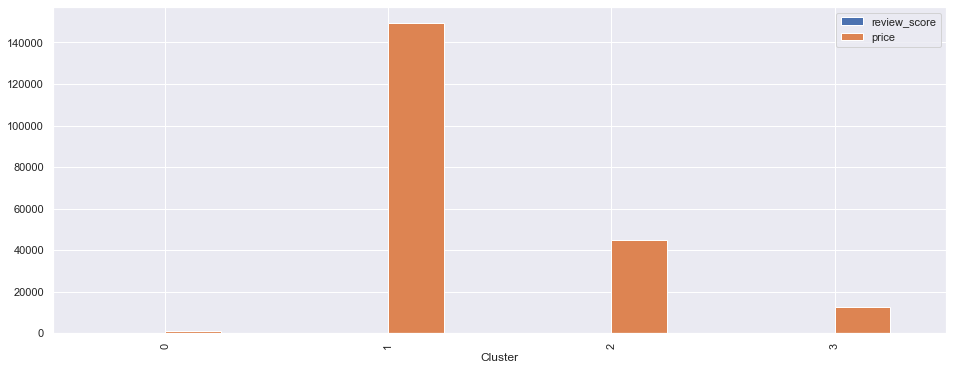

In [80]:
# Average Behaviour of each Cluster
cluster_data = pd.DataFrame(X_labeled.groupby(by = "Cluster").mean())
cluster_data.plot.bar(figsize = (16,6))

## Conclusion

### 1) Which Business Segment should the newcomer sell in?  
Observations: 
- Based on the average revenue of firms in each business segments, it seems that one can benefit from entering the **Baby, Pet or Airconditioning** segment. 
- A high number of sellers is not a strong indicator of whether a business segment can bring in high revenues.
- Note: Profits are not only reliant on revenue but also costs. Although revenues of firm in the Airconditioning category are high, costs are likely to be high as well, thus possibly reducing profit margins. On the other hand, many segments in the bottom 10, especially the bottom 5, are rather low-cost items. Hence, despite the low revenues generated, they may have significant profit margins. This may be the case for Car Accessories, hence explaining why many sellers choose to sell such items. 

### 2) When listing a product, which are the factors that most heavily influence revenue?  
Observations: 
- In the segments with high number of unique sellers, the only listing factor with significant impact on revenue is **freight value** (higher freight value, higher sales revenue)
- Note: When customers buy something expensive, they are usually willing to pay a higher freight price in order to ensure their purchase arrives safely. There is also a possibility that the items are bulkier, such as electronics, thus require higher costs to ship. However this relationship that higher freight values increase sales revenue is more likely to be correlation rather than causation. 

### 3) Does review score play a part in sales?
Observations: 
- Since we can identify that firms with high revenues have rather high and consistent review scores, this is what a newcomer should aim for. 
- This can be done by focusing on things like product quality, quick and on-time delivery, responsive and helpful customer service etc. 
